<a href="https://colab.research.google.com/github/MontherAzzam/GAZASKY/blob/main/CarPricePre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

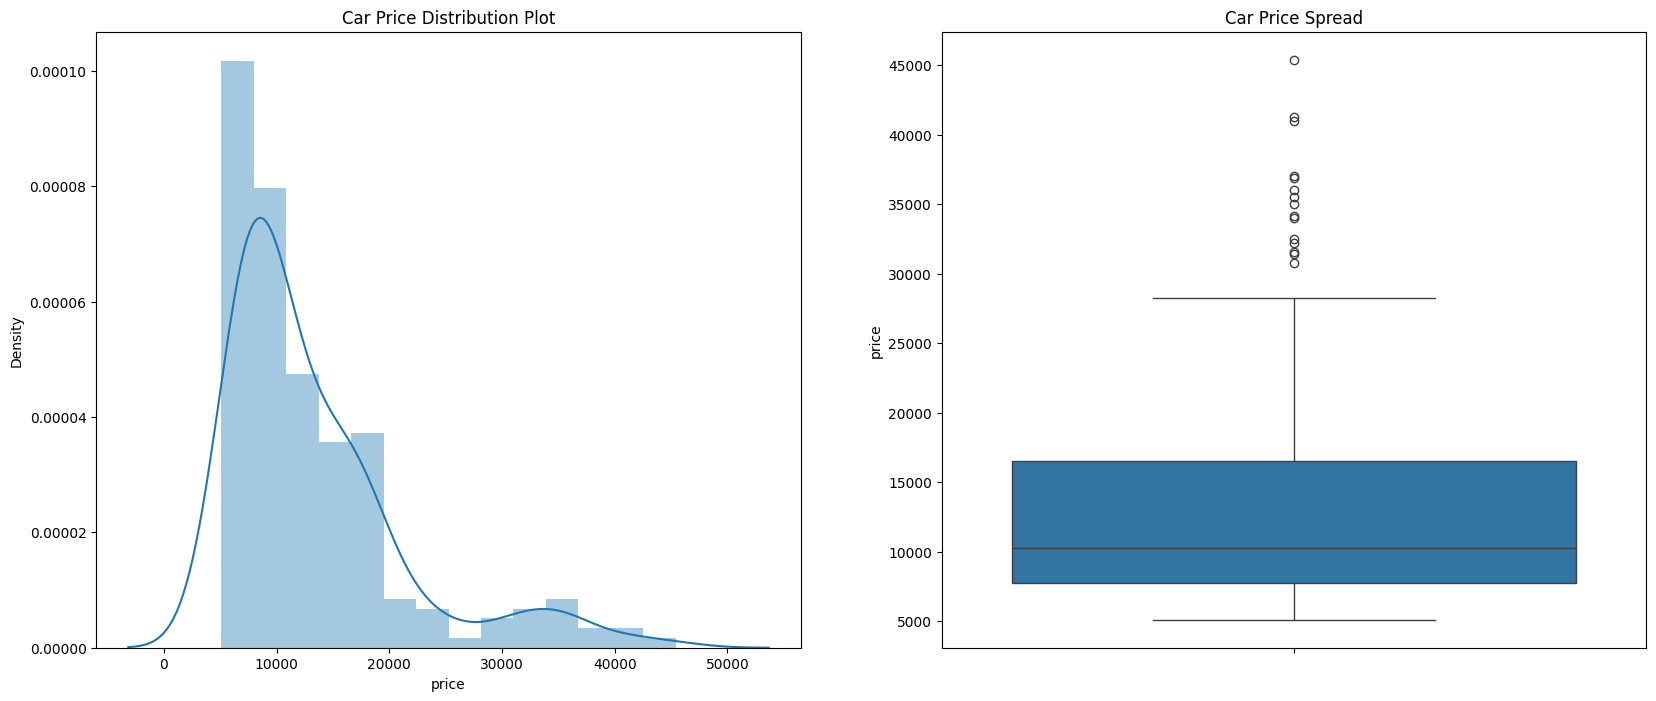

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
85%      18500.000000
90%      22563.000000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64


ValueError: could not convert string to float: 'gas'

In [31]:
import warnings
warnings.filterwarnings('ignore')

#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

cars = pd.read_csv('/content/CarPrice_Assignment.csv')
cars.head()

#cars.tail(10)
#cars.shape
#cars.describe()
#cars.info()

CompanyName = cars['CarName'].apply(lambda x : x.split(' ')[0])
cars.insert(3,"CompanyName",CompanyName)
cars.drop(['CarName'],axis=1,inplace=True)
cars.head()

cars.CompanyName.unique()
#print(CompanyName)

cars.CompanyName = cars.CompanyName.str.lower()

def replace_name(a,b):
    cars.CompanyName.replace(a,b,inplace=True)

replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

cars.CompanyName.unique()

cars.loc[cars.duplicated()]
cars.columns

plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(cars.price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=cars.price)

plt.show()

print(cars.price.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))


cars['fueleconomy'] = (0.55 * cars['citympg']) + (0.45 * cars['highwaympg'])

cars['price'] = cars['price'].astype('int')
temp = cars.copy()
table = temp.groupby(['CompanyName'])['price'].mean()
temp = temp.merge(table.reset_index(), how='left',on='CompanyName')
bins = [0,10000,20000,40000]
cars_bin=['Budget','Medium','Highend']
cars['carsrange'] = pd.cut(temp['price_y'],bins,right=False,labels=cars_bin)
cars.head()

cars_lr = cars[['price', 'fueltype', 'aspiration','carbody', 'drivewheel','wheelbase',
                  'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower',
                    'fueleconomy', 'carlength','carwidth', 'carsrange']]
cars_lr.head()

#sns.pairplot(cars_lr)
#plt.show()


from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(cars_lr, train_size = 0.7, test_size = 0.3, random_state = 100)


from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','fueleconomy','carlength','carwidth','price']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

y_train = df_train.pop('price')
X_train = df_train

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm, 10)
rfe = rfe.fit(X_train, y_train)



ValueError: could not convert string to float: 'gas'